In [1]:
import cv2 
import imutils
import numpy as np
from imutils.object_detection import non_max_suppression
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Initializing the HOG person detector 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 

In [81]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [89]:
# Reading the Image 
image = cv2.imread('people_walking.jpg') 

# Resizing the Image 
image = imutils.resize(image, width=min(400, image.shape[1])) 
orig = image.copy()   
show_image(orig)

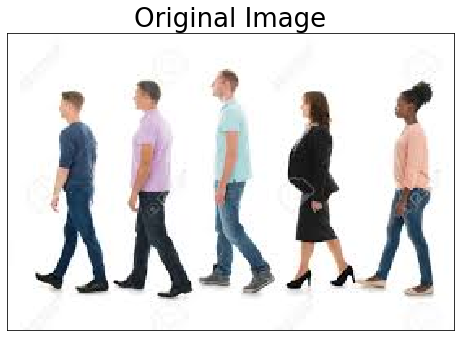

In [90]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [91]:
# Detecting all the regions in the  
# Image that has a pedestrians inside it 
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)

In [92]:
# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 1)
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
# thickness = 2
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 1)
    cv2.putText(image,'People',(xA, yA+10),cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,23,0),1,cv2.LINE_AA)
show_image(image)

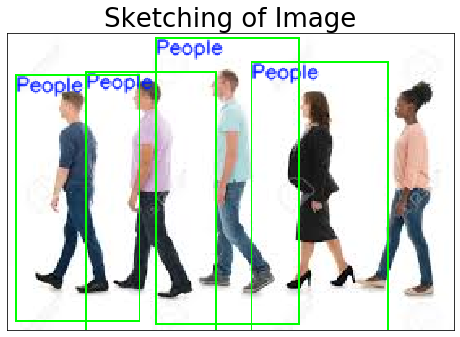

In [93]:
#Display output
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Sketching of Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()